<a href="https://colab.research.google.com/github/cmc227/ai-science-training-series/blob/main/Homeworks/2024_02_09_ccavill_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [3]:
# Read data
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-03-26 15:08:26--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-03-26 15:08:26 (54.8 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


<Axes: xlabel='GrLivArea'>

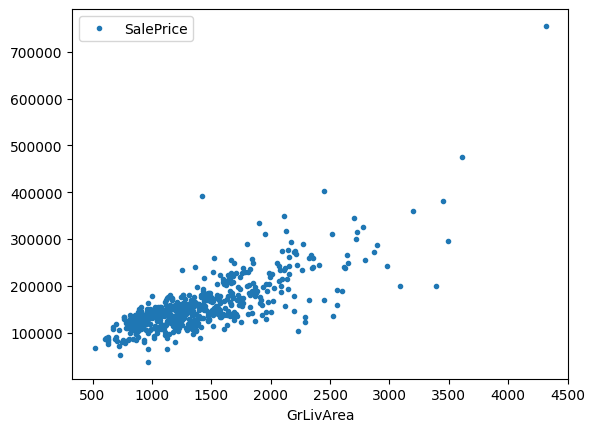

In [4]:
data.plot(x='GrLivArea', y='SalePrice',style='.')

In [5]:
n = len(data)

In [6]:
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

In [7]:
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

In [8]:
denominator = n * sum_x2 - sum_x * sum_x

In [9]:
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [10]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

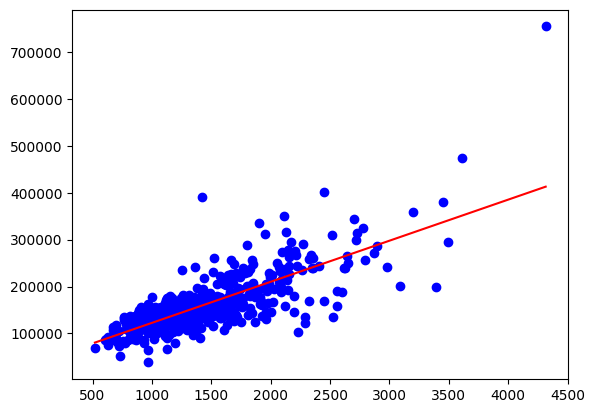

In [11]:
plot_data(x,y,m,b)

In [12]:
def model(x,m,b):
   return m * x + b

In [13]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [14]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

Batch size = 32


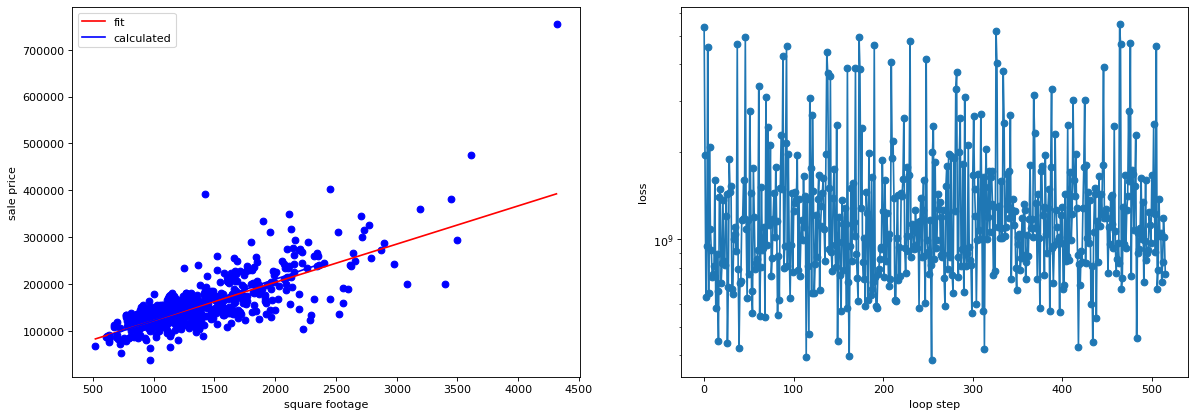

Batch size = 64


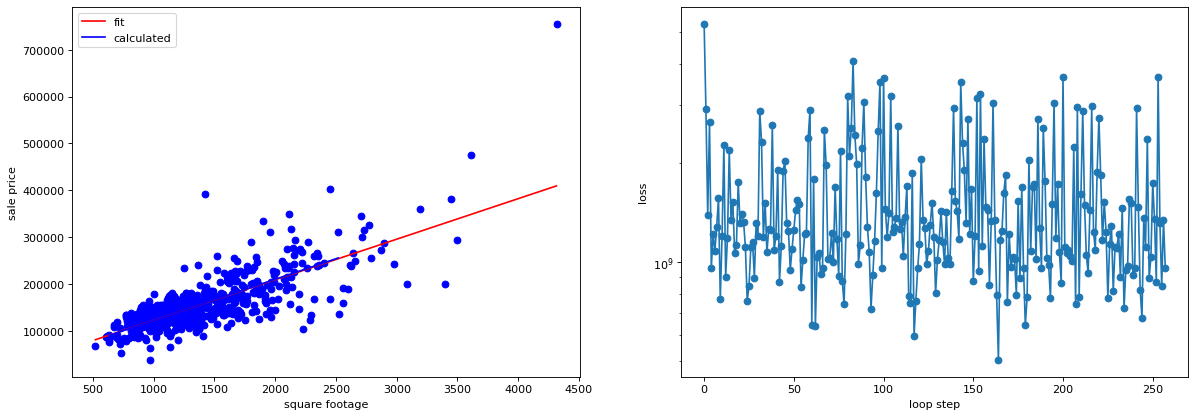

Batch size = 128


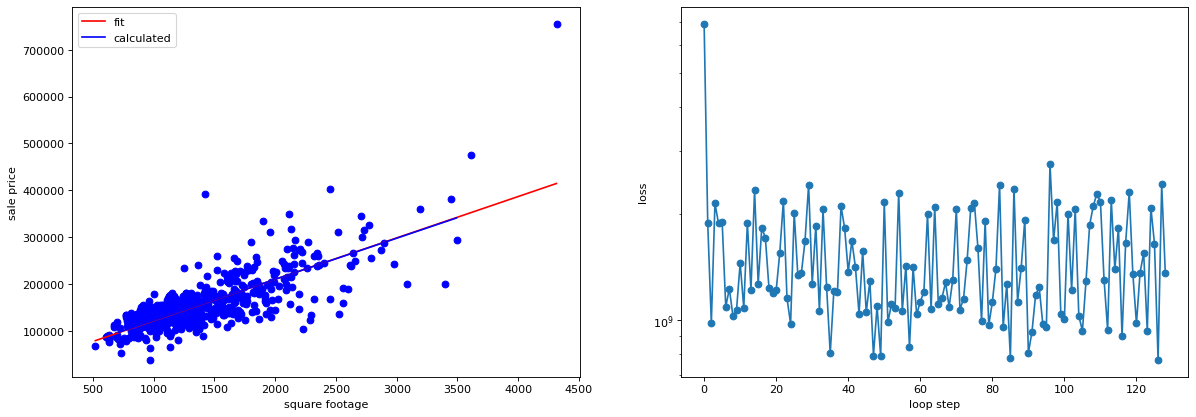

Batch size = 256


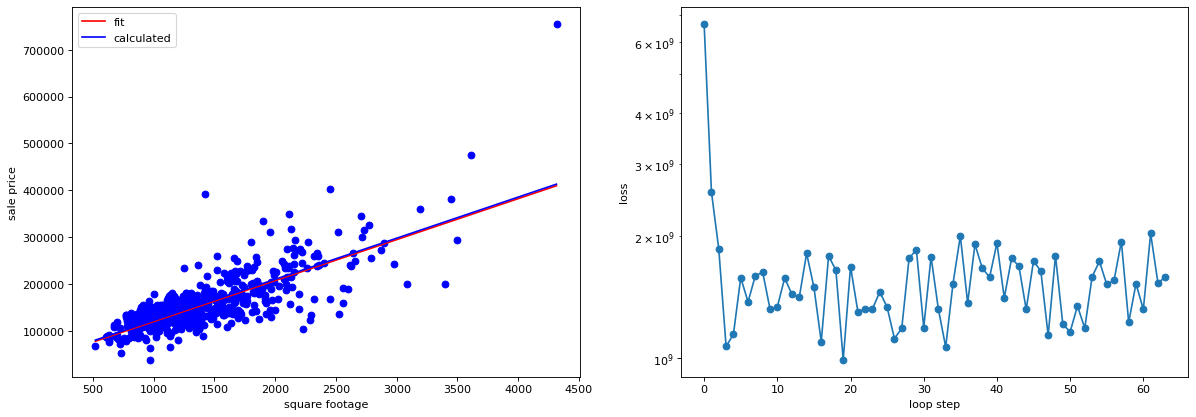

Batch size = 512


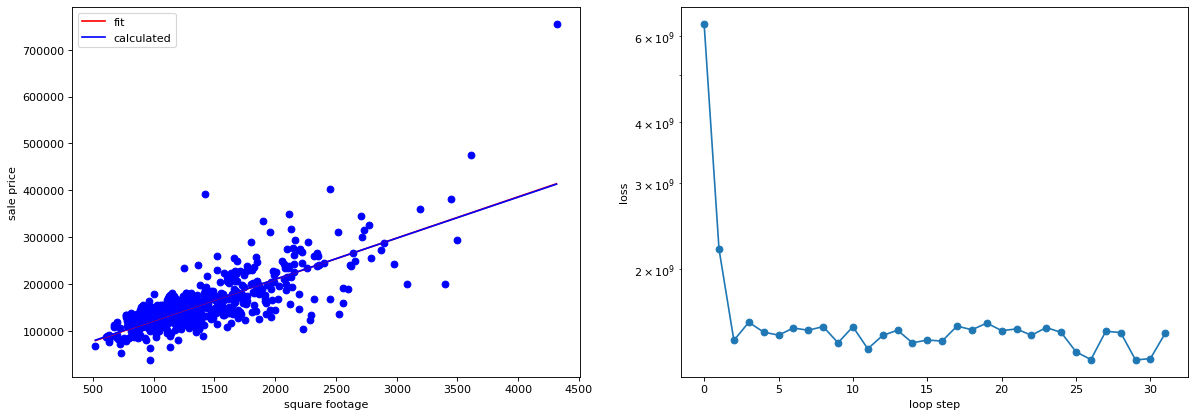

In [21]:
# set a learning rate
learning_rate_m = 1e-7
learning_rate_b = 1e-1

# loop through the different batch sizes
for batch_size in [32, 64, 128, 256, 512]:

  # set our initial slope and intercept
  m = 5.
  b = 1000.

  # use these to plot our progress over time
  loss_history = []

  # we run our loop N times
  loop_N = 30*len(data)//batch_size
  for i in range(loop_N):

    data_batch = data.sample(batch_size)
    # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
    data_x = data_batch['GrLivArea'].to_numpy()
    data_y = data_batch['SalePrice'].to_numpy()

    # update our slope and intercept based on the current values
    m = updated_m(data_x,data_y,m,b,learning_rate_m)
    b = updated_b(data_x,data_y,m,b,learning_rate_b)

    # calculate the loss value
    loss_value = np.mean(loss(data_x,data_y,m,b))

    # keep a history of our loss values
    loss_history.append(loss_value)

  # print the selected batch size
  print(f"Batch size = {batch_size}")
  # create a 1 by 2 plot grid
  fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)

  # update data
  x = data['GrLivArea'].to_numpy()
  y = data['SalePrice'].to_numpy()
  # lot our usual output
  plot_data(x,y,m,b,ax[0])

  # here we also plot the calculated linear fit for comparison
  line_x = np.arange(data_x.min(),data_x.max())
  line_y = line_x * m_calc + b_calc
  ax[0].plot(line_x,line_y,'b-',label='calculated')
  # add a legend to the plot and x/y labels
  ax[0].legend()
  ax[0].set_xlabel('square footage')
  ax[0].set_ylabel('sale price')

  # plot the loss
  loss_x = np.arange(0,len(loss_history))
  loss_y = np.asarray(loss_history)
  ax[1].plot(loss_x,loss_y, 'o-')
  ax[1].set_yscale('log')
  ax[1].set_xlabel('loop step')
  ax[1].set_ylabel('loss')
  plt.show()



